<a href="https://colab.research.google.com/github/joshuajennysibbu/Joz-Projects/blob/Generate-anime-face-image-Through-DCGAN/test_anime_dcgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torchvision
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from google.colab import files
import numpy as np
import os

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
params={
        'bsize':128, #batch size
        'imsize':64, #image size
        'nc':3, #number of channels
        'nz':128, #latent
        'ngf':64, #number of generator feature
        'ndf':64, #number of discriminator feature
        'nepochs':15, #number of epoch
        'lr':0.0002, #learning rate
        'save_epoch':2 #save models
    }

In [7]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [4]:
discriminator=nn.Sequential(
      nn.Conv2d(in_channels=params['nc'],
                out_channels=params['ngf'],
                kernel_size=4,
                stride=2,
                padding=2,
                bias=False),
      nn.BatchNorm2d(params['ndf']),
      nn.LeakyReLU(0.2,inplace=True),


      nn.Conv2d(params['ndf'],params['ndf']*2,4,2,1,bias=False),
      nn.BatchNorm2d(params['ndf']*2),
      nn.LeakyReLU(0.2,inplace=True),

      nn.Conv2d(params['ndf']*2,params['ndf']*4,4,2,1,bias=False),
      nn.BatchNorm2d(params['ndf']*4),
      nn.LeakyReLU(0.2,inplace=True),
                            
      nn.Conv2d(params['ndf']*4,params['ndf']*8,4,2,1,bias=False),
      nn.BatchNorm2d(params['ndf']*8),
      nn.LeakyReLU(0.2,inplace=True),

      nn.Conv2d(params['ndf']*8,1,kernel_size=4,stride=1,padding=0,bias=False),
      nn.Flatten(),
      nn.Sigmoid()
      
  )

In [5]:
generator=nn.Sequential(
    nn.ConvTranspose2d(in_channels=params['nz'],
                               out_channels=params['ngf']*8,
                               kernel_size=4,
                               stride=2,
                              padding=0,bias=False),
                    nn.BatchNorm2d(params['ngf']*8),
            nn.ReLU(True),


            nn.ConvTranspose2d(in_channels=params['ngf']*8,
                               out_channels=params['ngf']*4,
                               kernel_size=4,
                               stride=2,
                               padding=1,bias=False),
                        nn.BatchNorm2d(params['ngf']*4),
                        nn.ReLU(True),
                             
             nn.ConvTranspose2d(in_channels=params['ngf']*4,
                                out_channels=params['ngf']*2,
                                kernel_size=4,stride=2,padding=1,bias=False),
                          nn.BatchNorm2d(params['ngf']*2),
                          nn.ReLU(True),
                          
              nn.ConvTranspose2d(in_channels=params['ndf']*2,
                                 out_channels=params['ndf'],
                                 kernel_size=4,stride=2,padding=1,bias=False),
              nn.BatchNorm2d(params['ngf']),
              nn.ReLU(True),

            nn.ConvTranspose2d(params['ngf'],params['nc'],4,2,1,bias=False),
            nn.Tanh()
  )

In [10]:
discriminator = to_device(discriminator, device)
generator = to_device(generator, device)

In [11]:
def showImg(device,batch_size):
  figSize=(2,2)
  if device.type=='cuda':
    xb=torch.randn(batch_size,params['nz'],1,1,device='cuda')
  else:
    xb=torch.randn(batch_size,params['nz'],1,1,device='cpu')
  if batch_size>30:
    figSize=(15,15)
  with torch.no_grad():
      fake_img=generator(xb)
      fig,ax=plt.subplots(figsize=figSize)
      ax.set_xticks([]); ax.set_yticks([])
      ax.imshow(np.transpose(torchvision.utils.make_grid(fake_img, padding=1, normalize=True), (1,2,0)))

In [16]:
generatorss = torch.load('/content/drive/MyDrive/G.pth',map_location=torch.device('cpu'))
generator.load_state_dict(generatorss)

<All keys matched successfully>

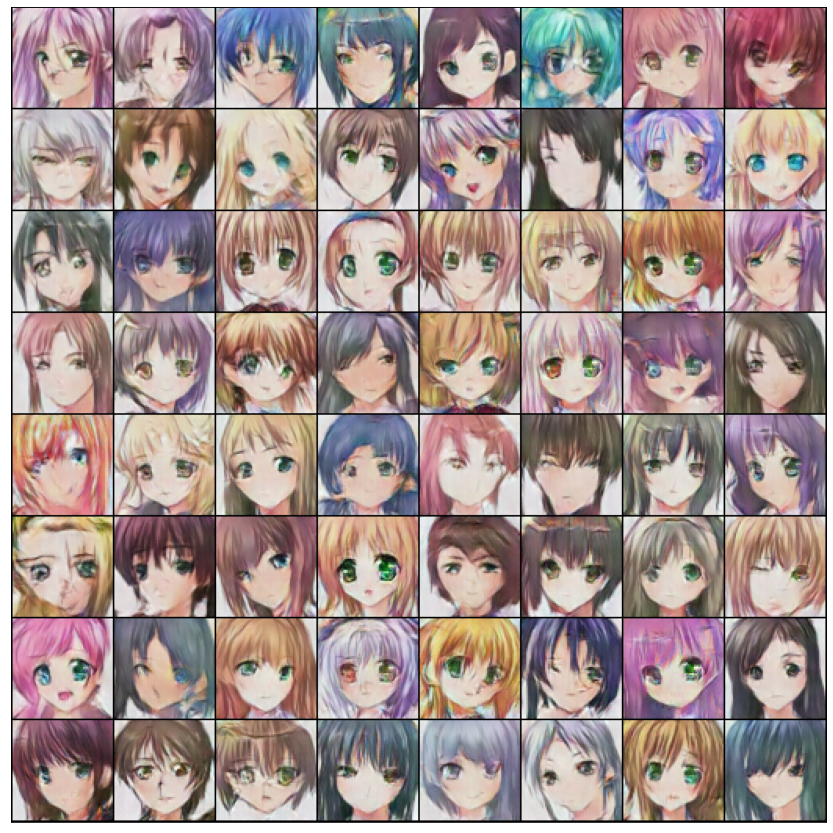

In [17]:
showImg(device,64)